<a href="https://colab.research.google.com/github/Ralinthip/Palmistry/blob/main/Pro_palmprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

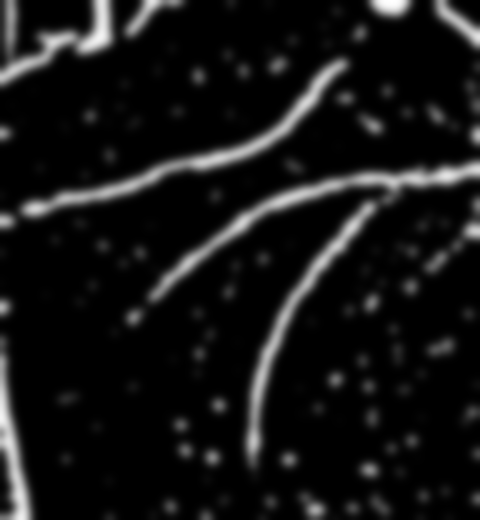

Perimeter of line 1: 1299.3910398483276
Perimeter of line 2: 737.251869559288
Perimeter of line 3: 650.8670934438705


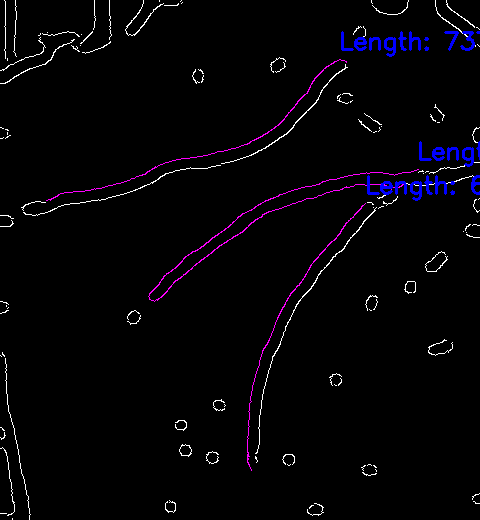

In [11]:
#จับเส้นที่ยาวที่สุดและวัดความยาว แต่เส้นที่ได้มีความโค้งใหญ่
import cv2
from google.colab.patches import cv2_imshow
import imutils
import numpy as np
from matplotlib import pyplot as plt

# โหลดภาพ
palm_image = cv2.imread('palmprint.jpg')

# แปลงภาพเป็นขาวดำ
gray = cv2.cvtColor(palm_image, cv2.COLOR_BGR2GRAY)
gray = imutils.resize(gray, width=600)

# กำหนด ROI สำหรับส่วนของมือ
x, y, w, h = 20, 170, 480, 520  # กำหนดค่า ROI (แก้ไขตามตำแหน่งและขนาดของมือในภาพ)
roi = gray[y:y+h, x:x+w]

# แสดงผลภาพที่ถูกตัดเฉพาะ ROI
#cv2_imshow(roi)

# ใช้ GaussianBlur เพื่อลด noise
blurred = cv2.GaussianBlur(roi, (29, 29), 0)
#cv2_imshow(blurred)

# แปลงภาพให้เป็น binary image โดยใช้ adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 29, 2
)
#cv2_imshow(adaptive_thresh)

# ใช้ GaussianBlur เพื่อลด noise อีกครั้ง
blurred = cv2.GaussianBlur(adaptive_thresh, (29, 29), 0)
cv2_imshow(blurred)

# การขยายขนาด (dilation) เพื่อลบรูเล็กๆ
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
#dilated = cv2.dilate(blurred, kernel, iterations=1)
#cv2_imshow(dilated)

# การปรับแต่งโครงสร้างด้วย Morphological Closing และ Opening
#morph_kernel = np.ones((15, 15), np.uint8)  # ใช้ np.uint8 แทน np.uint64
#morph_kernel1 = np.ones((15, 15), np.uint8)  # ใช้ np.uint8 แทน np.uint64
#closed_palmprint = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, morph_kernel)
#closed_palmprint = cv2.morphologyEx(closed_palmprint, cv2.MORPH_OPEN, morph_kernel1)

#plt.imshow(closed_palmprint, cmap='gray')

# การชาร์ปภาพก่อนใช้ Canny (เพิ่มความคมชัด)
#sharpening_kernel = np.array([[0, 0, 0],
#                              [0, 9, 0],
#                              [0, 0, 0]])  # ใช้ kernel ชาร์ป
#
#sharp_image = cv2.filter2D(blurred, -1, sharpening_kernel)  # ชาร์ปภาพ
#cv2_imshow(sharp_image)

# ตรวจสอบความคมชัดหลังจากชาร์ป

# ตรวจจับขอบด้วย Canny
edges = cv2.Canny(blurred, 50, 100)
#cv2_imshow(edges)

# ค้นหา Contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ฟังก์ชันสำหรับคำนวณความยาวของเส้น
def contour_length(contour):
    return cv2.arcLength(contour, True)  # ใช้ arcLength แทนการคำนวณจากพิกเซล

# คัดเลือกเส้นที่มีความยาวต่อเนื่องมากที่สุด 3 เส้น
sorted_contours = sorted(contours, key=contour_length, reverse=True)[:3]

# สร้างภาพสีเพื่อวาดเส้น
edge_overlay = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# วัดความยาวของเส้น (perimeter) และวาดเส้นที่ยาวที่สุด
for i, contour in enumerate(sorted_contours):
    perimeter = contour_length(contour)
    print(f"Perimeter of line {i + 1}: {perimeter}")

    # วาดเส้นสีม่วงสำหรับเส้นที่ยาวที่สุด
    cv2.drawContours(edge_overlay, [contour], -1, (255, 0, 255), 0)

    # เพิ่มข้อความความยาวเส้นลงในภาพ
    cv2.putText(edge_overlay, f"Length: {perimeter:.2f}",
                (contour[0][0][0], contour[0][0][1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# แสดงผลภาพที่รวมเส้นขอบและข้อความความยาว
cv2_imshow(edge_overlay)


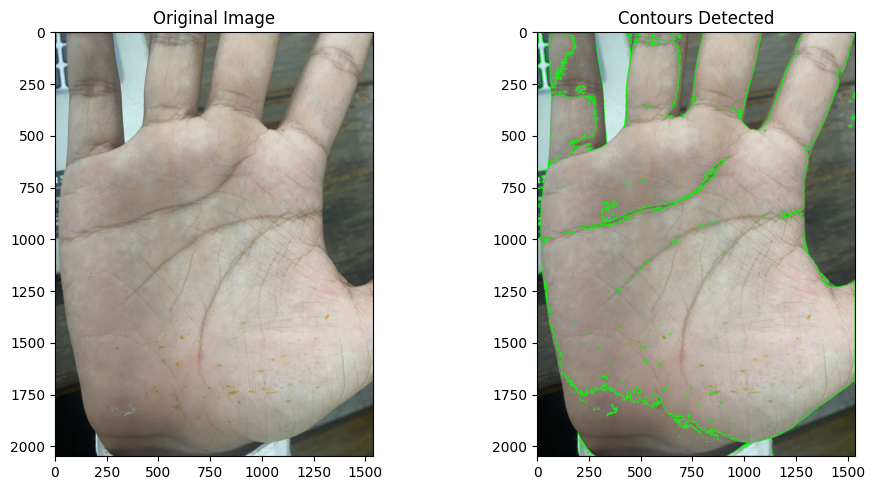

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# อ่านภาพและแปลงเป็น Grayscale
image = cv2.imread('palmprint.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# การ Threshold เพื่อแยกวัตถุจากพื้นหลัง
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# ค้นหา Contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# วาด Contours บนภาพต้นฉบับ
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)  # สีเขียว, ความหนาเส้น 2 px

# แสดงภาพ
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Contours Detected')
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()



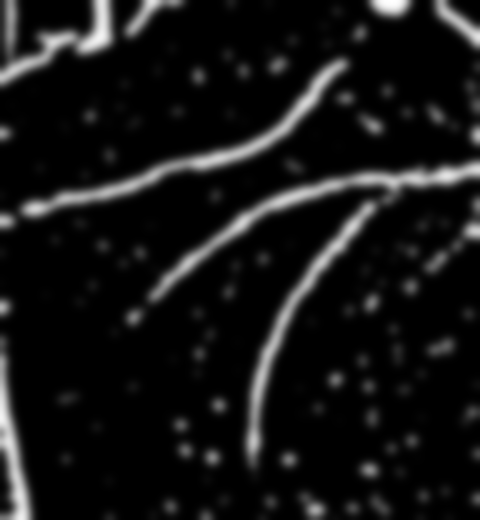

Perimeter of line 1: 1299.3910398483276
Perimeter of line 2: 737.251869559288
Perimeter of line 3: 650.8670934438705


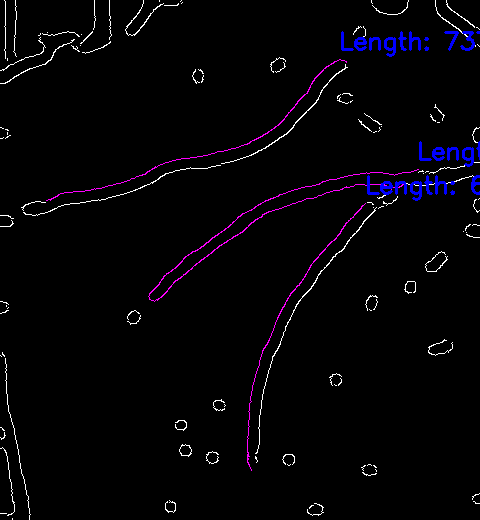

In [2]:
#จับเส้นที่ยาวที่สุดและวัดความยาว แต่เส้นที่ได้มีความโค้งใหญ่
import cv2
from google.colab.patches import cv2_imshow
import imutils
import numpy as np
from matplotlib import pyplot as plt

# โหลดภาพ
palm_image = cv2.imread('palmprint.jpg')

# แปลงภาพเป็นขาวดำ
gray = cv2.cvtColor(palm_image, cv2.COLOR_BGR2GRAY)
gray = imutils.resize(gray, width=600)

# กำหนด ROI สำหรับส่วนของมือ
x, y, w, h = 20, 170, 480, 520  # กำหนดค่า ROI (แก้ไขตามตำแหน่งและขนาดของมือในภาพ)
roi = gray[y:y+h, x:x+w]

# แสดงผลภาพที่ถูกตัดเฉพาะ ROI
#cv2_imshow(roi)

# ใช้ GaussianBlur เพื่อลด noise
blurred = cv2.GaussianBlur(roi, (29, 29), 0)
#cv2_imshow(blurred)

# แปลงภาพให้เป็น binary image โดยใช้ adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 29, 2
)
#cv2_imshow(adaptive_thresh)

# ใช้ GaussianBlur เพื่อลด noise อีกครั้ง
blurred = cv2.GaussianBlur(adaptive_thresh, (29, 29), 0)
cv2_imshow(blurred)

# การขยายขนาด (dilation) เพื่อลบรูเล็กๆ
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
#dilated = cv2.dilate(blurred, kernel, iterations=1)
#cv2_imshow(dilated)

# การปรับแต่งโครงสร้างด้วย Morphological Closing และ Opening
#morph_kernel = np.ones((15, 15), np.uint8)  # ใช้ np.uint8 แทน np.uint64
#morph_kernel1 = np.ones((15, 15), np.uint8)  # ใช้ np.uint8 แทน np.uint64
#closed_palmprint = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, morph_kernel)
#closed_palmprint = cv2.morphologyEx(closed_palmprint, cv2.MORPH_OPEN, morph_kernel1)

#plt.imshow(closed_palmprint, cmap='gray')

# การชาร์ปภาพก่อนใช้ Canny (เพิ่มความคมชัด)
#sharpening_kernel = np.array([[0, 0, 0],
#                              [0, 9, 0],
#                              [0, 0, 0]])  # ใช้ kernel ชาร์ป
#
#sharp_image = cv2.filter2D(blurred, -1, sharpening_kernel)  # ชาร์ปภาพ
#cv2_imshow(sharp_image)

# ตรวจสอบความคมชัดหลังจากชาร์ป

# ตรวจจับขอบด้วย Canny
edges = cv2.Canny(blurred, 50, 100)
#cv2_imshow(edges)

# ค้นหา Contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ฟังก์ชันสำหรับคำนวณความยาวของเส้น
def contour_length(contour):
    return cv2.arcLength(contour, True)  # ใช้ arcLength แทนการคำนวณจากพิกเซล

# คัดเลือกเส้นที่มีความยาวต่อเนื่องมากที่สุด 3 เส้น
sorted_contours = sorted(contours, key=contour_length, reverse=True)[:3]

# สร้างภาพสีเพื่อวาดเส้น
edge_overlay = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# วัดความยาวของเส้น (perimeter) และวาดเส้นที่ยาวที่สุด
for i, contour in enumerate(sorted_contours):
    perimeter = contour_length(contour)
    print(f"Perimeter of line {i + 1}: {perimeter}")

    # วาดเส้นสีม่วงสำหรับเส้นที่ยาวที่สุด
    cv2.drawContours(edge_overlay, [contour], -1, (255, 0, 255), 0)

    # เพิ่มข้อความความยาวเส้นลงในภาพ
    cv2.putText(edge_overlay, f"Length: {perimeter:.2f}",
                (contour[0][0][0], contour[0][0][1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# แสดงผลภาพที่รวมเส้นขอบและข้อความความยาว
cv2_imshow(edge_overlay)


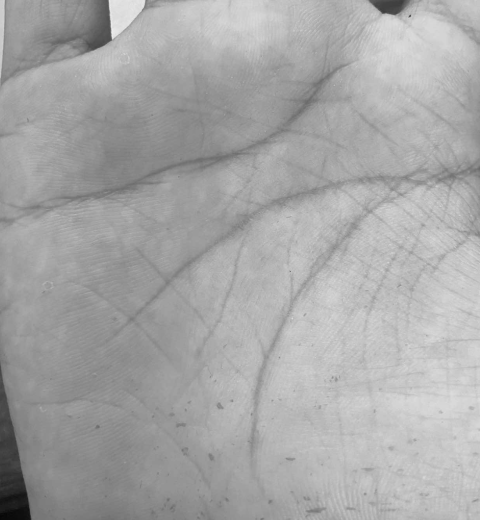

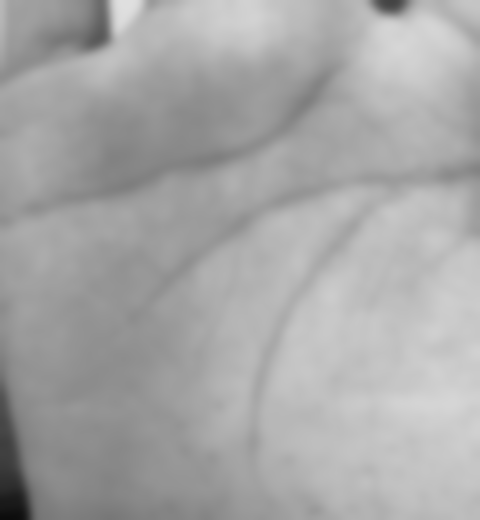

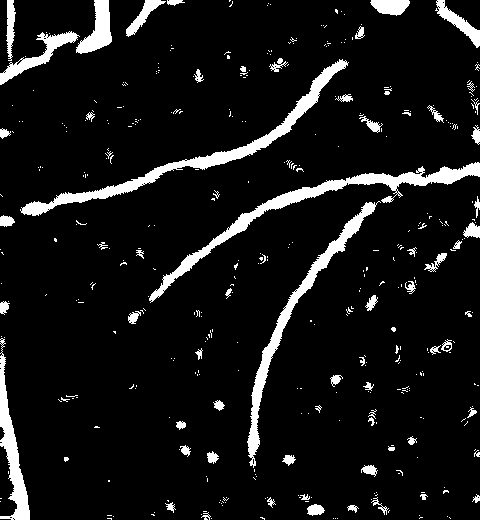

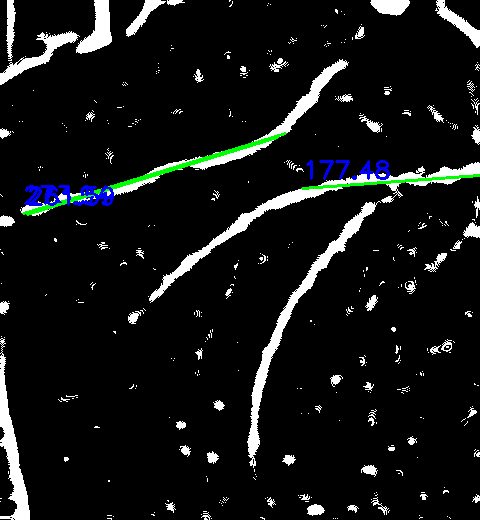

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import imutils
import numpy as np

# โหลดภาพ
palm_image = cv2.imread('palmprint.jpg')

# แปลงภาพเป็นขาวดำ
gray = cv2.cvtColor(palm_image, cv2.COLOR_BGR2GRAY)
gray = imutils.resize(gray, width=600)

# กำหนด ROI สำหรับส่วนของมือ
x, y, w, h = 20, 170, 480, 520  # กำหนดค่า ROI (แก้ไขตามตำแหน่งและขนาดของมือในภาพ)
roi = gray[y:y+h, x:x+w]

# แสดงผลภาพที่ถูกตัดเฉพาะ ROI
cv2_imshow(roi)

# ใช้ GaussianBlur เพื่อลด noise
blurred = cv2.GaussianBlur(roi, (29, 29), 0)
cv2_imshow(blurred)

# แปลงภาพให้เป็น binary image โดยใช้ adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 29, 2
)
cv2_imshow(adaptive_thresh)

# ตรวจจับเส้นโดยใช้ Hough Line Transform
lines = cv2.HoughLinesP(
    adaptive_thresh,             # ภาพขอบที่ตรวจพบจาก Canny
    1,                           # ความละเอียดของพิกเซลในแต่ละอาร์ค (rho)
    np.pi / 180,                 # ความละเอียดของมุม (theta)
    threshold=100,               # จำนวนขั้นต่ำของจุดที่ต้องการเพื่อที่จะมองว่าเป็นเส้น
    minLineLength=70,            # ความยาวขั้นต่ำของเส้น
    maxLineGap=10                # ระยะห่างสูงสุดระหว่างจุดสองจุดที่เชื่อมต่อกันเพื่อสร้างเส้น
)

# สร้างภาพสีเพื่อวาดเส้นที่ตรวจพบ
line_overlay = cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2BGR)

# ฟังก์ชันในการคำนวณความยาวเส้น
def calculate_line_length(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# เก็บเส้นและความยาว
line_lengths = []

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]  # การแยกค่า x1, y1, x2, y2 จากแต่ละเส้น

        # คำนวณความยาวของเส้น
        length = calculate_line_length(x1, y1, x2, y2)

        # เก็บข้อมูลเส้นและความยาว
        line_lengths.append(((x1, y1, x2, y2), length))

# เรียงเส้นตามความยาวจากมากไปน้อยและเลือกแค่ 3 เส้นที่ยาวที่สุด
top_lines = sorted(line_lengths, key=lambda x: x[1], reverse=True)[:3]

# วาดเส้น 3 เส้นที่ยาวที่สุด
for (x1, y1, x2, y2), length in top_lines:
    # วาดเส้นเป็นสีเขียว
    cv2.line(line_overlay, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # แสดงความยาวของเส้น
    cv2.putText(line_overlay, f"{length:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# แสดงผลภาพที่มีเส้น 3 เส้นที่ยาวที่สุด
cv2_imshow(line_overlay)


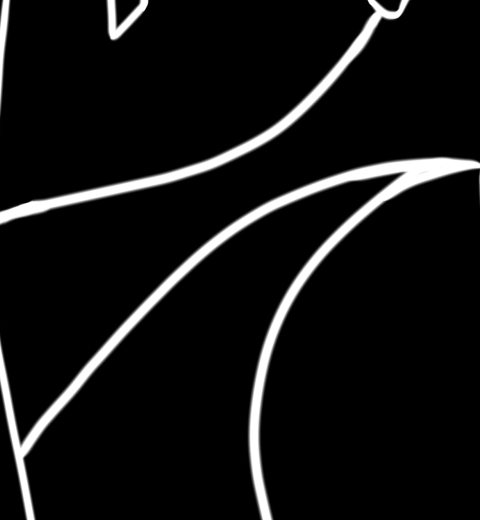

Perimeter of line 1: 3265.8430404663086
Perimeter of line 2: 1409.19002866745
Perimeter of line 3: 324.46803629398346


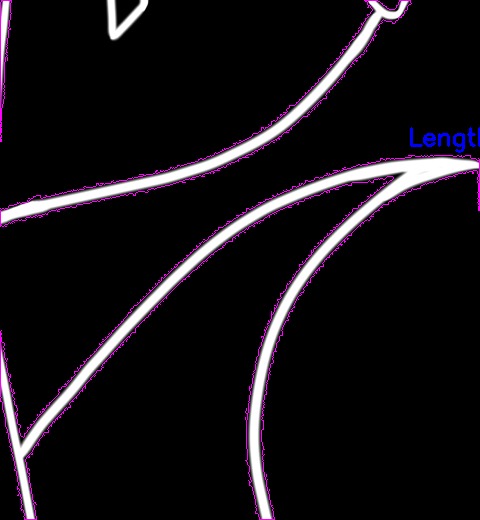

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import imutils
import numpy as np

# โหลดภาพ
palm_image = cv2.imread('palm.jpg')

# แปลงภาพเป็นขาวดำ
gray = cv2.cvtColor(palm_image, cv2.COLOR_BGR2GRAY)
gray = imutils.resize(gray, width=600)

# กำหนด ROI สำหรับส่วนของมือ
x, y, w, h = 20, 170, 480, 520  # กำหนดค่า ROI (แก้ไขตามตำแหน่งและขนาดของมือในภาพ)
roi = gray[y:y+h, x:x+w]

# แสดงผลภาพที่ถูกตัดเฉพาะ ROI
cv2_imshow(roi)

# ใช้ GaussianBlur เพื่อลด noise
#blurred = cv2.GaussianBlur(roi, (29, 29), 0)

# แปลงภาพให้เป็น binary image โดยใช้ adaptive thresholding
#adaptive_thresh = cv2.adaptiveThreshold(
#    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 29, 2
#)
#cv2_imshow(adaptive_thresh)

# Skeletonization
# สร้าง mask สำหรับ skeleton
#skeleton = np.zeros_like(adaptive_thresh)

# ใช้การสลับคำนวณ skeleton โดยการใช้การลบของภาพ
#element = cv2.getStructuringElement(cv2.MORPH_CROSS, (15, 15))

#while True:
#    open_img = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, element)
#    temp = cv2.subtract(adaptive_thresh, open_img)
#    skeleton = cv2.bitwise_or(skeleton, temp)
#    adaptive_thresh = cv2.erode(adaptive_thresh, element)

#    if cv2.countNonZero(adaptive_thresh) == 0:
#        break

# แสดงผลภาพที่ได้หลังจากการทำ Skeletonization
#cv2_imshow(skeleton)

# ค้นหา Contours
contours, _ = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ฟังก์ชันสำหรับคำนวณความยาวของเส้น
def contour_length(contour):
    return cv2.arcLength(contour, True)  # ใช้ arcLength แทนการคำนวณจากพิกเซล

# คัดเลือกเส้นที่มีความยาวต่อเนื่องมากที่สุด 3 เส้น
sorted_contours = sorted(contours, key=contour_length, reverse=True)[:3]

# สร้างภาพสีเพื่อวาดเส้น
edge_overlay = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)

# วัดความยาวของเส้น (perimeter) และวาดเส้นที่ยาวที่สุด
for i, contour in enumerate(sorted_contours):
    perimeter = contour_length(contour)
    print(f"Perimeter of line {i + 1}: {perimeter}")

    # วาดเส้นสีม่วงสำหรับเส้นที่ยาวที่สุด
    cv2.drawContours(edge_overlay, [contour], -1, (255, 0, 255), 0)

    # เพิ่มข้อความความยาวเส้นลงในภาพ
    cv2.putText(edge_overlay, f"Length: {perimeter:.2f}",
                (contour[0][0][0], contour[0][0][1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# แสดงผลภาพที่รวมเส้นขอบและข้อความความยาว
cv2_imshow(edge_overlay)


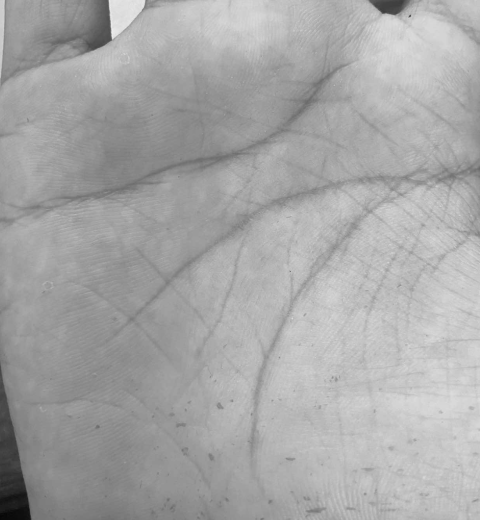

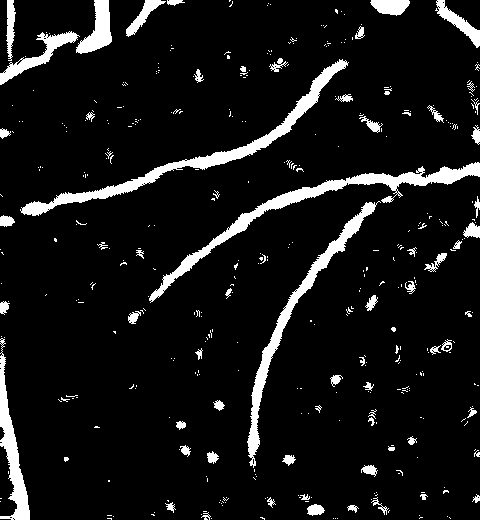

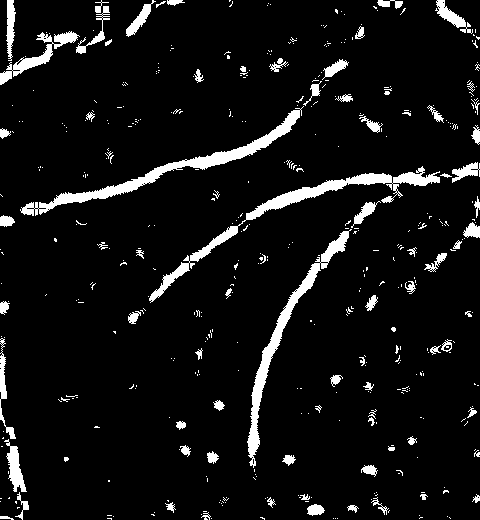

Perimeter of line 1: 1044.9991233348846
Perimeter of line 2: 842.5067011117935
Perimeter of line 3: 694.6072070598602


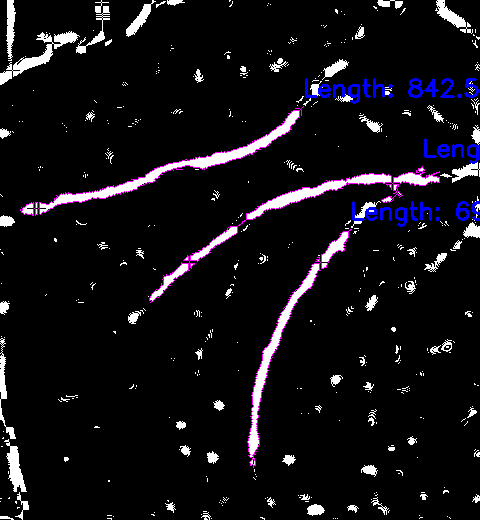

In [9]:
import cv2
from google.colab.patches import cv2_imshow
import imutils
import numpy as np

# โหลดภาพ
palm_image = cv2.imread('palmprint.jpg')

# แปลงภาพเป็นขาวดำ
gray = cv2.cvtColor(palm_image, cv2.COLOR_BGR2GRAY)
gray = imutils.resize(gray, width=600)

# กำหนด ROI สำหรับส่วนของมือ
x, y, w, h = 20, 170, 480, 520  # กำหนดค่า ROI (แก้ไขตามตำแหน่งและขนาดของมือในภาพ)
roi = gray[y:y+h, x:x+w]

# แสดงผลภาพที่ถูกตัดเฉพาะ ROI
cv2_imshow(roi)

# ใช้ GaussianBlur เพื่อลด noise
blurred = cv2.GaussianBlur(roi, (29, 29), 0)

# แปลงภาพให้เป็น binary image โดยใช้ adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 29, 2
)
cv2_imshow(adaptive_thresh)

# Skeletonization
# สร้าง mask สำหรับ skeleton
skeleton = np.zeros_like(adaptive_thresh)

# ใช้การสลับคำนวณ skeleton โดยการใช้การลบของภาพ
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (15, 15))

while True:
    open_img = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(adaptive_thresh, open_img)
    skeleton = cv2.bitwise_or(skeleton, temp)
    adaptive_thresh = cv2.erode(adaptive_thresh, element)

    if cv2.countNonZero(adaptive_thresh) == 0:
        break

# แสดงผลภาพที่ได้หลังจากการทำ Skeletonization
cv2_imshow(skeleton)

# ค้นหา Contours
contours, _ = cv2.findContours(skeleton, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ฟังก์ชันสำหรับคำนวณความยาวของเส้น
def contour_length(contour):
    return cv2.arcLength(contour, True)  # ใช้ arcLength แทนการคำนวณจากพิกเซล

# คัดเลือกเส้นที่มีความยาวต่อเนื่องมากที่สุด 3 เส้น
sorted_contours = sorted(contours, key=contour_length, reverse=True)[:3]

# สร้างภาพสีเพื่อวาดเส้น
edge_overlay = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)

# วัดความยาวของเส้น (perimeter) และวาดเส้นที่ยาวที่สุด
for i, contour in enumerate(sorted_contours):
    perimeter = contour_length(contour)
    print(f"Perimeter of line {i + 1}: {perimeter}")

    # วาดเส้นสีม่วงสำหรับเส้นที่ยาวที่สุด
    cv2.drawContours(edge_overlay, [contour], -1, (255, 0, 255), 0)

    # เพิ่มข้อความความยาวเส้นลงในภาพ
    cv2.putText(edge_overlay, f"Length: {perimeter:.2f}",
                (contour[0][0][0], contour[0][0][1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# แสดงผลภาพที่รวมเส้นขอบและข้อความความยาว
cv2_imshow(edge_overlay)
